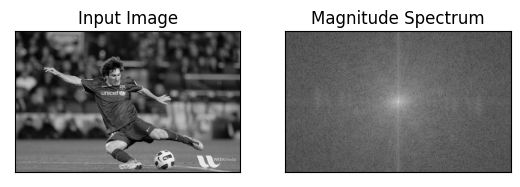

In [19]:
# NumPy 的 FFT
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/messi5.jpg', 0)

# fft
f = np.fft.fft2(img)

# 移动到中心
fshift = np.fft.fftshift(f)

# 幅度
magnitude_spectrum = 20*np.log(np.abs(fshift))

# 显示
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


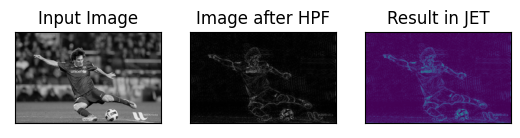

In [21]:
# NumPy 的 FFT
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/messi5.jpg', 0)

# fft
f = np.fft.fft2(img)

# 移动到中心
fshift = np.fft.fftshift(f)

# 低频信号较多部分置0
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0

# 逆移动
f_ishift = np.fft.ifftshift(fshift)

# 逆变换
img_back = np.fft.ifft2(f_ishift)

# img_back = np.real(img_back) # 官网此处有误
img_back = np.abs(img_back)


# 显示
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

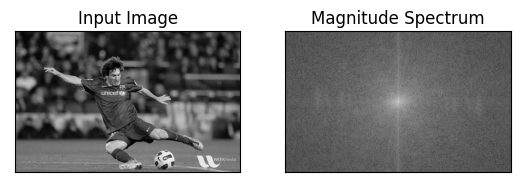

In [18]:
# OpenCV dft
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/messi5.jpg', 0)

# 进行 dft 运算
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# 移动到中心
dft_shift = np.fft.fftshift(dft)

# 计算幅度
magnitude_spectrum = 20 * \
    np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# 显示
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


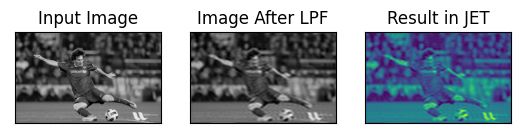

In [25]:
# OpenCV dft
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/messi5.jpg', 0)

# 进行 dft 运算
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# 移动到中心
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
# crow,ccol = rows/2 , cols/2 # 官网此处代码也有误, 宽高除2不一定是整数
crow, ccol = rows//2, cols//2

# 建立一个mask
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+31, ccol-30:ccol+31] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image After LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()


In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/messi5.jpg', 0)

rows, cols = img.shape
print("{} {}".format(rows, cols))
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print("{} {}".format(nrows, ncols))



342 548
360 576


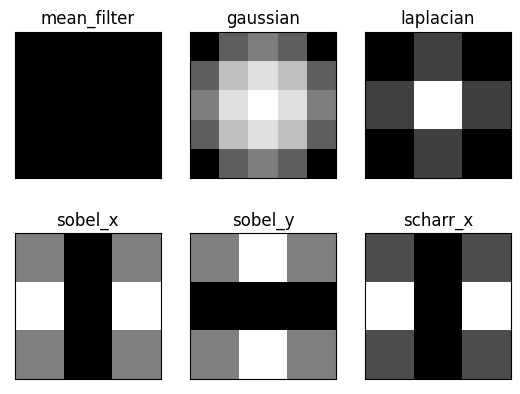

In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                [-10,0,10],
                [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                [0, 0, 0],
                [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]

# # 逆移动
# f_ishift = np.fft.ifftshift(fshift)

# # 逆变换
# img_back = np.fft.ifft2(f_ishift)

# # img_back = np.real(img_back) # 官网此处有误
# img_back = np.abs(img_back)

# mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

fft_ishift = [np.fft.ifftshift(z) for z in fft_shift]

img_back = [np.fft.ifft2(z) for z in fft_ishift]

mag_spectrum = [np.abs(z) for  z in img_back]



for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()